### Table of contents
#### Importing libraries
#### Importing data
#### Exploring relationships

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

### Importing data

In [2]:
# Creating path

path = r"C:\Users\tseki\OneDrive\Documents\Careerfoundry\Data immersion\Achievement 6"

In [5]:
# Importing data

data = pd.read_csv(os.path.join(path, 'Data', 'Prepared', 'MA_clean_data.csv'), index_col = [0])

In [6]:
data.head()

,price,bed,bath,acre_lot,city,zip_code,house_size,sold_date
24237,525000.0,3.0,3.0,0.45,Agawam,1001.0,2314.0,2014-06-25
24238,289900.0,3.0,2.0,0.36,Agawam,1001.0,1276.0,2012-10-12
24244,384900.0,3.0,2.0,0.46,Agawam,1001.0,1476.0,1986-11-20
24251,199999.0,3.0,2.0,1.76,Agawam,1001.0,1968.0,2008-09-19
24258,419000.0,4.0,2.0,2.00,Pelham,1002.0,1607.0,2005-07-25


### Exploring relationships

#### Creating correlation heatmap

In [7]:
# Create a subset excluding the "sold_date" and "city" columns

subset = data[['price', 'bed', 'bath', 'acre_lot','zip_code', 'house_size']]

In [8]:
subset

,price,bed,bath,acre_lot,zip_code,house_size
24237,525000.0,3.0,3.0,0.45,1001.0,2314.0
24238,289900.0,3.0,2.0,0.36,1001.0,1276.0
24244,384900.0,3.0,2.0,0.46,1001.0,1476.0
24251,199999.0,3.0,2.0,1.76,1001.0,1968.0
24258,419000.0,4.0,2.0,2.00,1002.0,1607.0
...,...,...,...,...,...,...
227070,560000.0,4.0,2.0,0.20,1545.0,2640.0
233354,650000.0,6.0,4.0,0.15,1570.0,4012.0
341449,380000.0,3.0,2.0,0.21,1020.0,1336.0
424916,399900.0,4.0,3.0,0.43,1585.0,2968.0


Text(0.5, 1.0, 'Correlation Matrix')

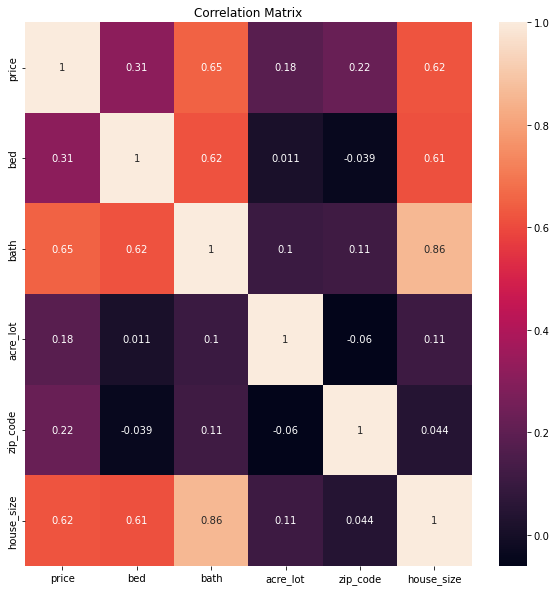

In [10]:
# Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(subset.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

plt.title('Correlation Matrix')

##### Price is the variable of interest. There is a strong positive relationship between price and bath(0.65). Also, there is strong positive relationship between price and  house_size(0.62). There's a weak-to-moderate postive relationship between price and bed (0.31).

##### This makes sense as houses with more baths and beds tend to cost more. Also, bigger houses are more expensive.

##### In terms of correlation strength, bath>house_size>bed

#### Creating scatterplots

In [11]:
# To further understand the relationship the price and the variables with the strongest correlation (Bath and house_size)
# I would create a scatterplot.

Text(0.5, 1.0, 'Scatterplot of Price and Bath')

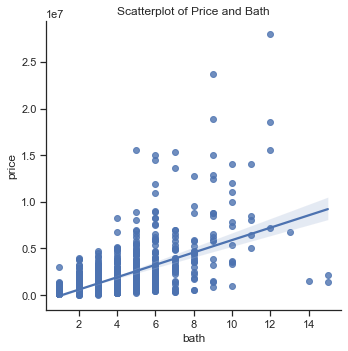

In [38]:
# Creating a scatterplot for the "price" and "bath" columns

sns.lmplot(x = 'bath', y = 'price', data = data)
plt.title('Scatterplot of Price and Bath')

##### Generally a positive relationship can be seen betweeen price and number of baths. Only with a few exceptions, 3 data points
##### (at the bottom right) having 14 and 15 baths with lower price.

Text(0.5, 1.0, 'Scatterplot of Price and House_size')

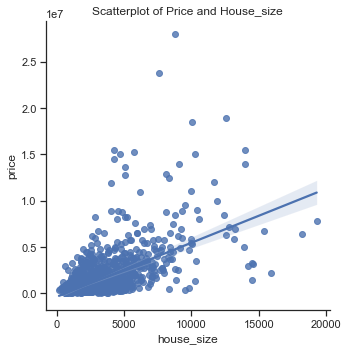

In [39]:
# Creating a scatterplot for the "price" and "house_size" columns

sns.lmplot(x = 'house_size', y = 'price', data = data)
plt.title('Scatterplot of Price and House_size')

##### Generally a positive relationship can be seen betweeen price and house_size. 
##### Though a few exceptions have significantly high price with less than 10,000 sq ft and greater than 10,000 sq ft with lower prices.

#### Pair Plots

In [16]:
# Creating a dataframe for only the variables I want to use in the pair plot

sub = subset[['price', 'bed', 'bath', 'acre_lot', 'house_size']]

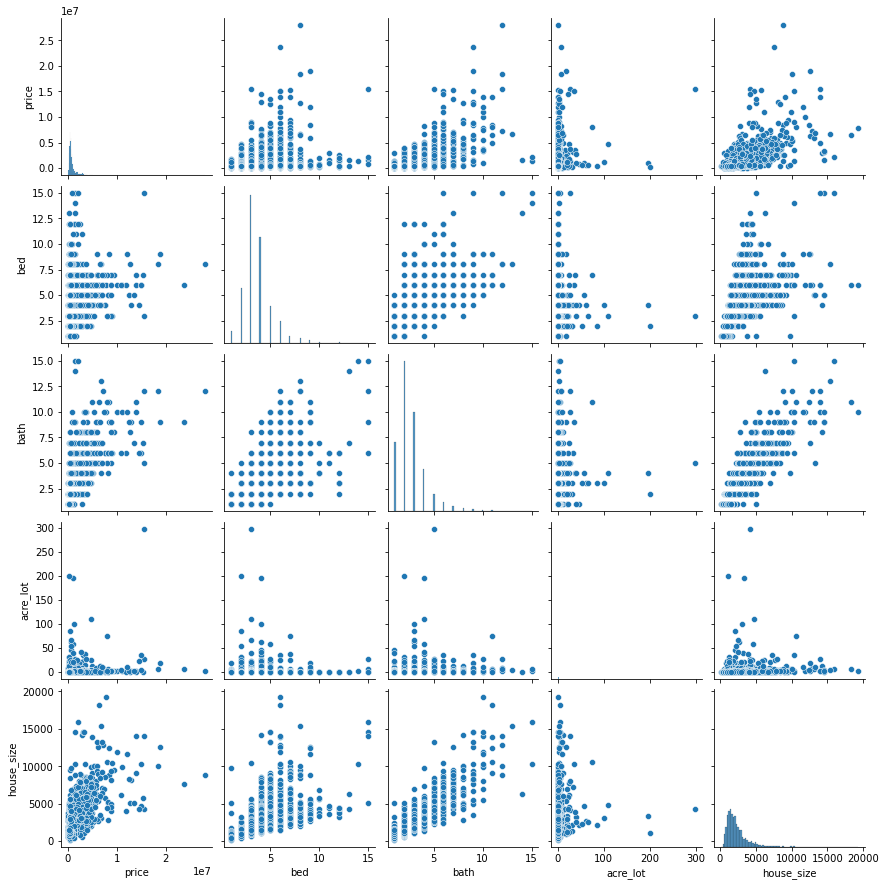

In [17]:
# Creating pair plot 

g = sns.pairplot(sub)

##### From the scatterplots, there's indeed a closer relationship between 'price' and 'bath' and between 'price' and 'house_size' compared to between 'price' and 'beds'.

##### Though one would expect number of beds to also have a strong relationship with prices. However, I guess people might pay more for a 3 bedroom with 3.5 baths, than for a 4 bedroom with 1.5 baths. So i think though number of bedrooms influence the price of the house, people still pay more attention to the number of baths available.

##### I would like to explore further the variables with the strongest relationships, house_size and baths.

#### Categorical plot

##### Creating a categorical variable that splits the "price" column into categories

<AxesSubplot:xlabel='price', ylabel='Count'>

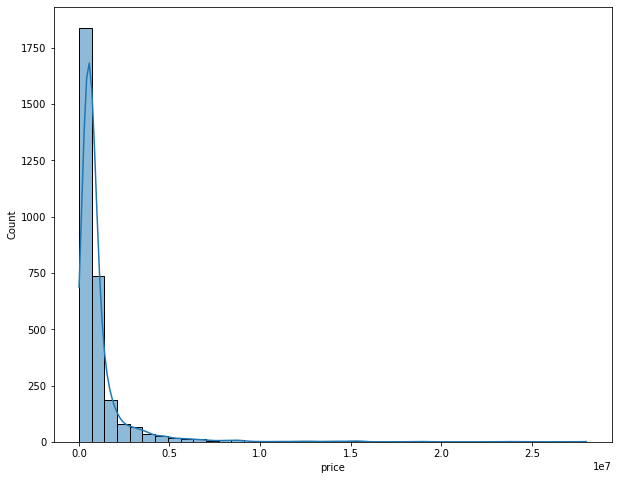

In [28]:
# craeting histogram to see  distribution

plt.figure(figsize=(10,8))
sns.histplot(data['price'], bins = 40, kde = True)

In [30]:
# Creating new column 'price_category' based on certain conditions

data.loc[data['price'] < 300000, 'price_category'] = 'Low price'

In [31]:
data.loc[(data['price'] >= 300000) & (data['price'] <= 700000), 'price_category'] = 'Medium price'

In [32]:
data.loc[(data['price'] > 700000) & (data['price'] <= 1200000), 'price_category'] = 'High price'

In [33]:
data.loc[data['price'] > 1200000, 'price_category'] = 'Very high price'

In [34]:
# Checking output

data['price_category'].value_counts(dropna = False)

Medium price       1488
High price          637
Very high price     573
Low price           350
Name: price_category, dtype: int64

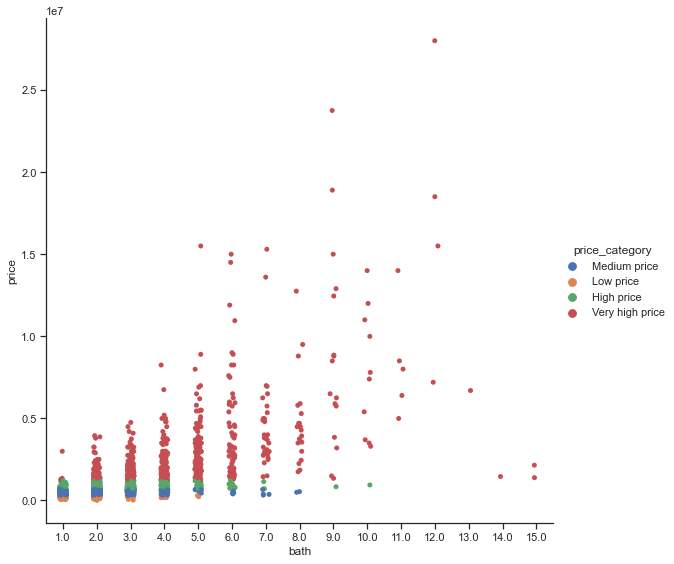

In [37]:
# Creating a categorical plot using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x = "bath", y = "price", hue = "price_category", data = data, height = 8, aspect = 1)

##### As expected low price properties only have 5 or less baths. Medium price properties have 8 or less baths. 
##### Houses with more than 8 baths mostly fall in the very-high price range.